# Module 4 - Exercise 2 - Linear Regression

## Implementing Linear Regression using vectorization technique

In [2]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  # **************** your code here ****************

  return features_X, sales_Y

In [8]:
data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[: , :3]
y = data[: , :3]

def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X-avg) / (maxi-mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

In [14]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    # Initialize theta
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            # Select random index
            random_index = i

            # Select xi and yi
            xi = X_b[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]

            # Compute predicted value
            y_pred = np.dot(xi, thetas)

            # Compute loss
            loss = (1/2) * (y_pred - yi) ** 2
            losses.append(loss[0][0])

            # Compute gradient
            gradients = np.dot(xi.T, (y_pred - yi))

            # Update thetas
            thetas = thetas - learning_rate * gradients

            # Log the path of thetas
            thetas_path.append(thetas)

    return thetas_path, losses


### Question 1

In [18]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

# dataset
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:,:3]
y = data[:,3:]

# Normalize input data by using mean normalization
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    N = X_b.shape[0]
    
    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np.random.randint(N) #In real application, you should use this code
            random_index = i # This code is used for this assignment only
            
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # Compute output
            y_pred = xi @ thetas
            
            # Compute loss li
            li = ((y_pred - yi) ** 2) / 2
            
            # Compute gradient for loss
            gradient = xi.T @ (y_pred - yi)
            
            # Update theta
            thetas = thetas - learning_rate * gradient
            
            # logging
            thetas_path.append(thetas)
            losses.append(li[0][0])
    
    return thetas_path, losses

# Run the stochastic gradient descent
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)

# Print the sum of losses
print(np.sum(losses))


6754.643359356192


### Question 2

In [21]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

# Load dataset
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:,:3]
y = data[:,3:]

# Normalize input data by using mean normalization
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        # shuffled_indices = np.random.permutation(N) # uncomment this code for real application
        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55, 133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])
        
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i: i + minibatch_size]
            yi = y_shuffled[i: i+minibatch_size]
            
            # Compute output
            y_pred = xi @ thetas
            
            # compute loss
            loss = ((y_pred - yi) ** 2) / 2
            
            # compute derivative of loss
            error = y_pred - yi
            
            # compute derivative of parameters
            gradients = (xi.T @ error) / minibatch_size
            
            # update parameters
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)
            
            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)
    
    return thetas_path, losses

mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)

print(round(sum(losses), 2))
            

8865.65


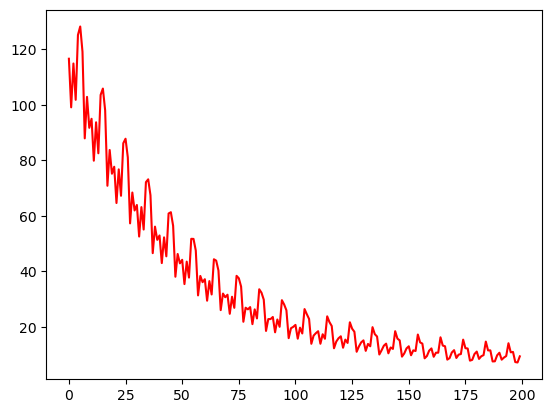

In [22]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.show()

### Question 3

5571.73


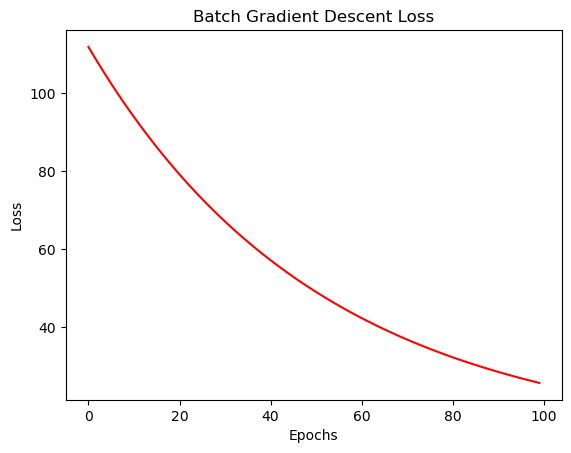

In [25]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

# Load dataset
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:,:3]
y = data[:,3:]

# Normalize input data by using mean normalization
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X, axis=0)
    mini = np.min(X, axis=0)
    avg = np.mean(X, axis=0)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    
    for i in range(n_epochs):
        # compute output (vectorized)
        y_pred = X_b @ thetas
        
        # Compute loss (vectorized)
        loss = np.sum((y_pred - y) ** 2) / (2 * N)
        
        # Compute loss's derivative (vectorized)
        error = y_pred - y
        
        # compute parameters' derivative (vectorized)
        gradients = (X_b.T @ error) / N
        
        # Update parameters
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)
        
        losses.append(loss)
    
    return thetas_path, losses

# Run batch gradient descent
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

# Print the rounded sum of losses
print(round(sum(losses), 2))

# Optional: Plot the losses
x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color="r")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent Loss')
plt.show()

## Bài tập 2: Bitcoin Forecasting

In [29]:
import pandas as pd

df = pd.read_csv('./BTC-Daily.csv')

# Remove duplicate rows
df = df.drop_duplicates()
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

# Extract year, month, and day from the date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Get unique years
unique_years = df['year'].unique()

# Count of unique years (this will be the number of charts)
num_charts = len(unique_years)
print(f"Number of charts to be created: {num_charts}")

for year in unique_years:
    # Create a complete date range for the year
    start_date = pd.to_datetime(f"{year}-01-01")
    end_date = pd.to_datetime(f"{year}-12-31")
    year_month_day = pd.date_range(start=start_date, end=end_date)
    year_month_day = pd.DataFrame({'date': year_month_day})
    year_month_day['year'] = year_month_day['date'].dt.year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day

2014-11-28 to 2022-03-01
Number of charts to be created: 9
